In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = 10, 10

In [20]:
filename = "torso"
df0 = pd.read_csv(filename, sep=",", header=None, names=["algo", "sym_num", "threads", "time"], skipinitialspace=True,
                  dtype = {"algo": str, "sym_num": str, "threads": int, "time": float}, skipfooter=1, engine='python')
df0['sym_num'] = df0['sym_num'].astype(str)
print(df0.size)
df0.head()

812


,algo,sym_num,threads,time
0,lsolve_reachset,symbolic,1,0.047757
1,lsolve_reachset,numeric,1,0.011877
2,lsolve_eigen,numeric,1,0.009183
3,lsolve_eigen_par,numeric,1,0.024446
4,lsolve_simple,numeric,1,0.015366


In [22]:
df = pd.DataFrame(df0.groupby(["algo", "sym_num", "threads"], as_index=False)["time"].mean()).sort_values("algo")
df

,algo,sym_num,threads,time
0,lsolve_eigen,numeric,1,0.011683
1,lsolve_eigen,symbolic,1,0.000000
2,lsolve_eigen_par,numeric,1,0.026988
3,lsolve_eigen_par,numeric,2,0.058491
4,lsolve_eigen_par,numeric,3,0.043684
5,lsolve_eigen_par,numeric,4,0.079628
6,lsolve_eigen_par,symbolic,1,0.000000
7,lsolve_reachset,numeric,1,0.012834
8,lsolve_reachset,symbolic,1,0.046375
9,lsolve_simple,numeric,1,0.022292


In [23]:
data = {
    "algo": [],
    "symbolic": [],
    "numeric": []
}

for i, ((algo), group) in enumerate(df.groupby(["algo"])):
    data["algo"].append(algo)
    for j, ((symnum), subgroup) in enumerate(group.groupby(["sym_num"])):
        data[symnum].append(list(subgroup["time"])[0])

data

{'algo': ['lsolve_eigen',
  'lsolve_eigen_par',
  'lsolve_reachset',
  'lsolve_simple'],
 'numeric': [0.01168302295,
  0.026987989700000003,
  0.012834323649999998,
  0.022292479924999997],
 'symbolic': [0.0, 0.0, 0.046374648099999992, 0.0]}

In [24]:
multiplier = 1000000
for k in ["symbolic", "numeric"]:
    data[k] = list(map(lambda x: x*multiplier, data[k]))
data

{'algo': ['lsolve_eigen',
  'lsolve_eigen_par',
  'lsolve_reachset',
  'lsolve_simple'],
 'numeric': [11683.02295,
  26987.989700000002,
  12834.323649999998,
  22292.479924999996],
 'symbolic': [0.0, 0.0, 46374.648099999991, 0.0]}

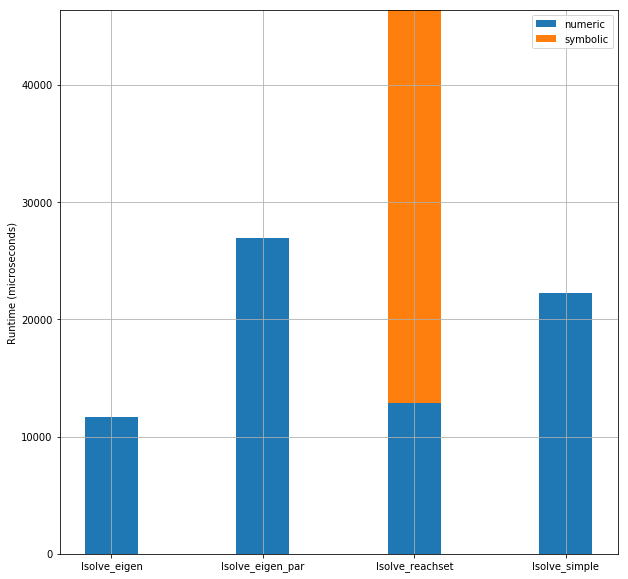

In [25]:

N = len(data["algo"])
x = np.arange(N)
w = 0.35

p1 = plt.bar(x, data["numeric"], w)
p2 = plt.bar(x, data["symbolic"], w, bottom=data["numeric"])

plt.ylabel('Runtime (microseconds)')
plt.xticks(x, data["algo"])
plt.ylim(0, max(data["numeric"] + data["symbolic"]))
plt.legend((p1[0], p2[0]), ('numeric', 'symbolic'))
plt.grid()

plt.show()
